### Importing Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\processed data\\Data_for_models\\train_prep_data.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,3.0,6.0,0.949275,0.883333,1.0,0.12250,2.0,2.0,...,2.0,0.368280,5.0,5.0,2.0,0.000000,0.082210,4.0,208500.0,12.247694
2,0.202055,0.038795,3.0,5.0,0.753623,0.433333,1.0,0.00000,3.0,1.0,...,2.0,0.309140,5.0,5.0,2.0,0.209270,0.000000,4.0,181500.0,12.109011
3,0.160959,0.046507,0.0,6.0,0.934783,0.866667,1.0,0.10125,2.0,2.0,...,2.0,0.408602,5.0,5.0,2.0,0.000000,0.056604,4.0,223500.0,12.317167
4,0.133562,0.038561,0.0,6.0,0.311594,0.333333,1.0,0.00000,3.0,0.0,...,3.0,0.431452,5.0,5.0,2.0,0.000000,0.047170,0.0,140000.0,11.849398
5,0.215753,0.060576,0.0,7.0,0.927536,0.833333,1.0,0.21875,2.0,2.0,...,3.0,0.561828,5.0,5.0,2.0,0.134831,0.113208,4.0,250000.0,12.429216


# Building Machine Learning Model

### Importing Libraries

In [3]:
# !pip install xgboost

In [4]:
# split data and score model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ML models
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor

### Clustering

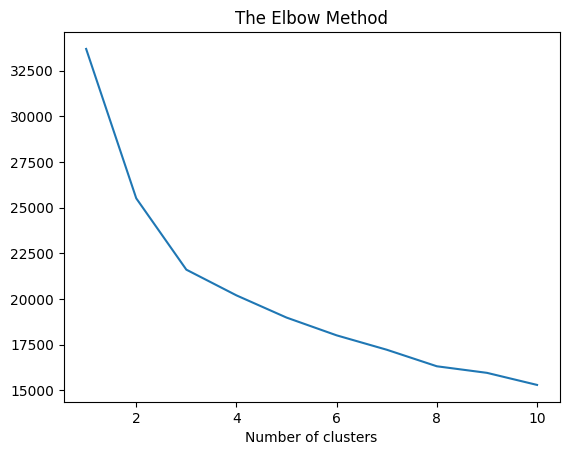

In [5]:
X = df.drop(['SalePrice', 'log_SalePrice'], axis=1)
num_of_clusters = range(1, 11)
iners = []


for i in num_of_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    iners.append(kmeans.inertia_)

    
plt.plot(num_of_clusters, iners)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [6]:
y_clusters = df['OverallQual'].replace({ range(1, 5):0, range(5, 11):1 })

kmeans = KMeans(n_clusters=2, random_state=42, init='random').fit(X) # high Quality - low Quality
labels = kmeans.labels_
correct_labels = sum(y_clusters == labels)

print(f"Result: {correct_labels} out of {y_clusters.size} samples were correctly labeled.")
print('Accuracy score: ', (correct_labels/float(y_clusters.size)))

Result: 1130 out of 1460 samples were correctly labeled.
Accuracy score:  0.773972602739726


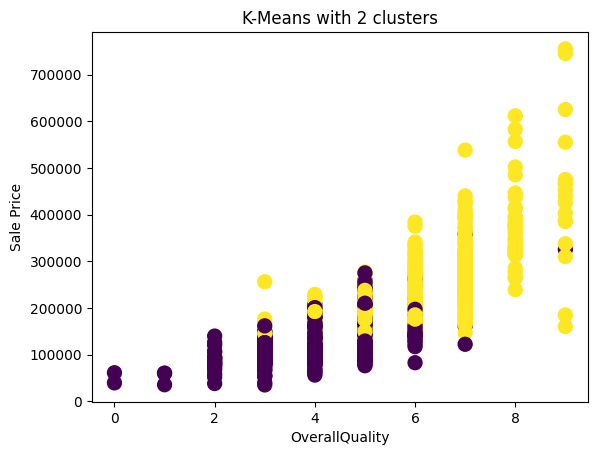

In [7]:
plt.scatter(df['OverallQual'], np.e**df['log_SalePrice'], c=kmeans.labels_, s=100)
plt.title('K-Means with 2 clusters')
plt.xlabel('OverallQuality')
plt.ylabel('Sale Price')
plt.show()

### Simple LinearRegression Model..

In [8]:
X = df.drop(['SalePrice', 'log_SalePrice'], axis=1)
y = df['log_SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

L_regr = LinearRegression().fit(x_train, y_train)
y_pred = L_regr.predict(x_test)

print(f'Train Score: {L_regr.score(x_train, y_train)*100:.2f}%')
print( f'Linear-Model score: {r2_score(y_test, y_pred)*100:.2f}%')

rmse = np.sqrt(mean_squared_error(np.e**y_test, np.e**y_pred))
print(f"Root Mean Squared Error {rmse:.0f}")

Train Score: 85.43%
Linear-Model score: 86.70%
Root Mean Squared Error 28927


### LinearRegression Model With Regularization term..

In [9]:
R_regr = RidgeCV(alphas=[0.0001, 0.001, 0.01]).fit(x_train, y_train)
y_pred1 = R_regr.predict(x_test)

print(f'Train Score: {R_regr.score(x_train, y_train)*100:.2f}%')
print( f'R-Model score: {r2_score(y_test, y_pred1)*100:.2f}%')

rmse = np.sqrt(mean_squared_error(np.e**y_test, np.e**y_pred1))
print(f"Root Mean Squared Error {rmse:.0f}")

Train Score: 85.43%
R-Model score: 86.71%
Root Mean Squared Error 28923


### Decision Trees

In [10]:
X = df.drop(['SalePrice', 'log_SalePrice'], axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT_regr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = DT_regr.predict(x_test)

print('Train Score:',DT_regr.score(x_train, y_train))
print( f'R-Model Score: {r2_score(y_test, y_pred)*100:.2f}%')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error {rmse:.0f}")

Train Score: 1.0
R-Model Score: 79.01%
Root Mean Squared Error 40121


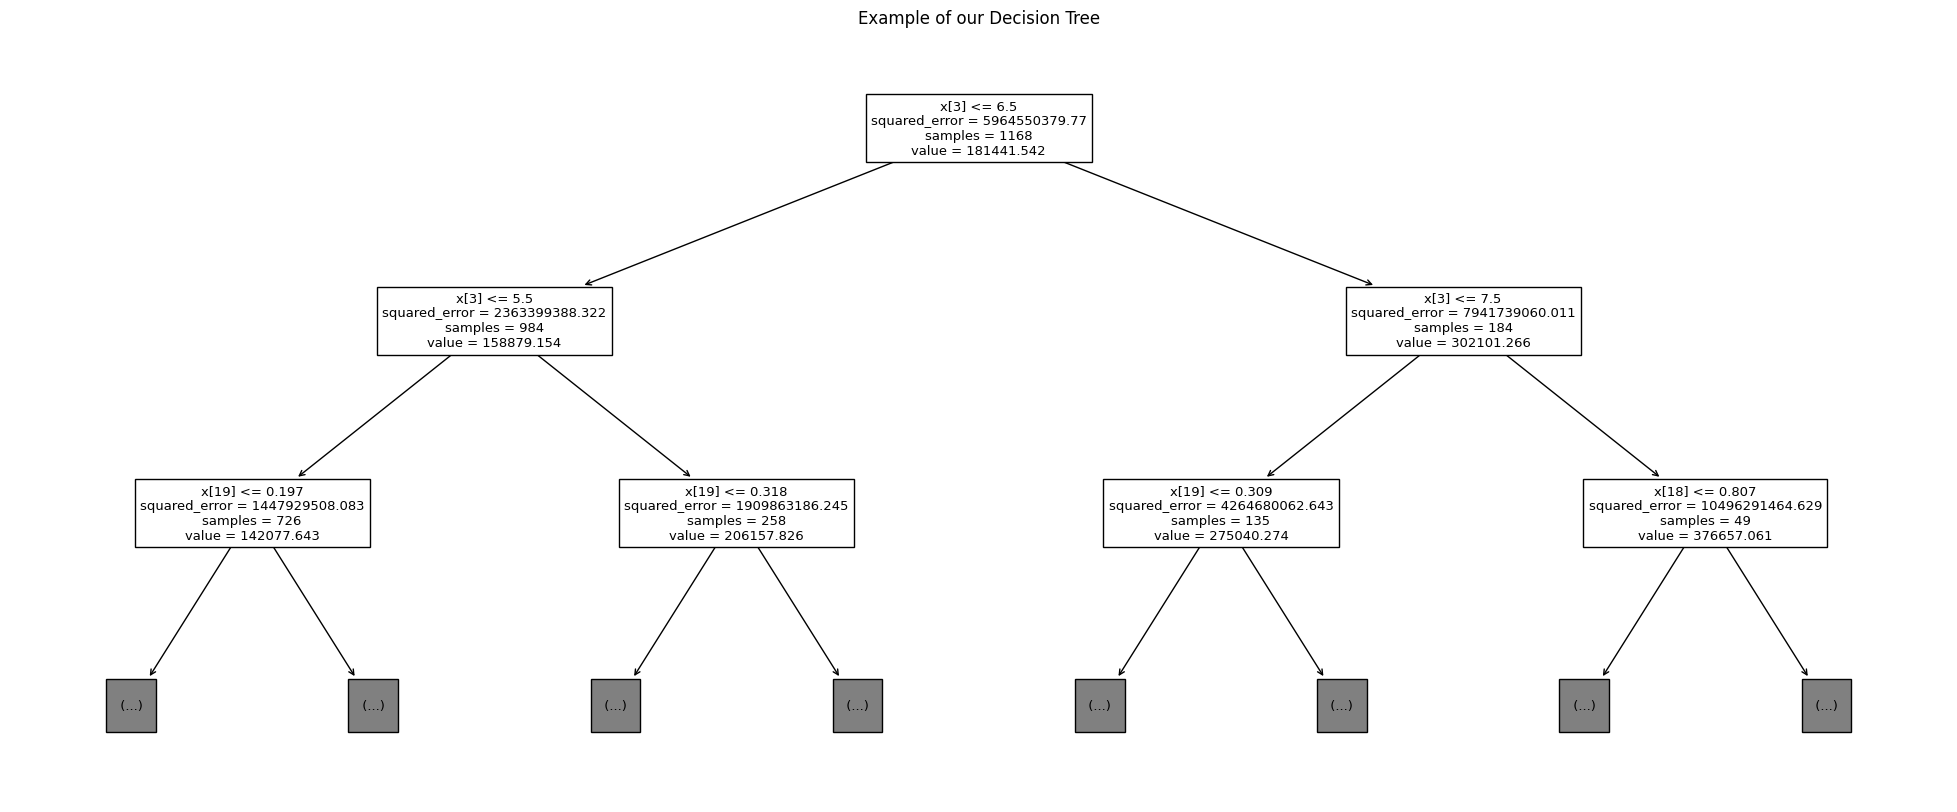

In [11]:
plt.figure(figsize=(25,10))
plot_tree(DT_regr, max_depth=2)
plt.title('Example of our Decision Tree')
plt.show()

### Hyperparameter Tuning for Model

In [12]:
params = {
    'random_state': [42],
    'max_depth': [7, 10, 15],
    'min_samples_leaf': [7, 10, 15],
    'criterion': ['absolute_error', 'squared_error']
}

DT_regr = DecisionTreeRegressor()
model = GridSearchCV(estimator=DT_regr, param_grid=params, cv=4).fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Train Score:',model.score(x_train, y_train))
print('Model Score:',model.score(x_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error {rmse:.0f}")
model.best_estimator_

Train Score: 0.8465386763668397
Model Score: 0.8276039925883006
Root Mean Squared Error 36364


DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=10, random_state=42)

### Random Forest

In [13]:
param_grid = {
    'random_state': [42],
    'max_depth': [20, 30],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2],
    'n_estimators': [800]
}

RF_regr = RandomForestRegressor()
model = GridSearchCV(estimator=RF_regr, param_grid=param_grid, cv=2, n_jobs = -1).fit(x_train, y_train)

y_pred2 = model.predict(x_test)

print('Train Score:',model.score(x_train, y_train))
print('Model Score:',model.score(x_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f"Root Mean Squared Error {rmse:.0f}")
model.best_estimator_

Train Score: 0.9684116091919224
Model Score: 0.8885467393453998
Root Mean Squared Error 29238


RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=800,
                      random_state=42)

### Extreme Gradient Boosting

In [14]:
param_grid = {
    'random_state': [42],
    'nthread':[4], #when use hyperthread, xgboost may become slower
    'learning_rate': [.03, 0.05], #so called `eta` value
    'max_depth': [7],
    'min_child_weight': [2, 3],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500]
}

XGB_regr = XGBRegressor()
model = GridSearchCV(estimator=XGB_regr, param_grid=param_grid, cv=2, n_jobs=-1).fit(x_train, y_train)

y_pred3 = model.predict(x_test)

print('Train Score:',model.score(x_train, y_train))
print('Model Score:',model.score(x_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f"Root Mean Squared Error {rmse:.0f}")
model.best_estimator_

Train Score: 0.9956705987375083
Model Score: 0.9175489637801882
Root Mean Squared Error 25148


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

### Make Predictions

In [15]:
path = 'D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\processed data\\Data_for_models\\test_prep_data.csv'
test = pd.read_csv(path, index_col=0)
test.head()

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.202055,0.048246,3.0,4.0,0.644928,0.183333,1.0,0.0000,3.0,1.0,...,0.888536,3.0,1.0,0.490591,5.0,5.0,2.0,0.098315,0.000000,4.0
1462,0.205479,0.060609,0.0,5.0,0.623188,0.133333,1.0,0.0675,3.0,1.0,...,0.887177,3.0,1.0,0.209677,5.0,5.0,2.0,0.275983,0.048518,4.0
1463,0.181507,0.058566,0.0,4.0,0.905797,0.800000,1.0,0.0000,3.0,2.0,...,0.904848,0.0,2.0,0.323925,5.0,5.0,2.0,0.148876,0.045822,4.0
1464,0.195205,0.040562,0.0,5.0,0.913043,0.800000,1.0,0.0125,3.0,2.0,...,0.905301,0.0,2.0,0.315860,5.0,5.0,2.0,0.252809,0.048518,4.0
1465,0.075342,0.017318,0.0,7.0,0.869565,0.700000,1.0,0.0000,2.0,2.0,...,0.902583,2.0,2.0,0.340054,5.0,5.0,2.0,0.000000,0.110512,4.0


In [16]:
my_pred = model.predict(test)
my_Summ = pd.DataFrame(my_pred, index=test.index, columns=['SalePrice'])
my_Summ

,SalePrice
Id,
1461,125938.632812
1462,162220.359375
1463,184814.250000
1464,183691.078125
1465,194828.625000
...,...
2915,76929.210938
2916,85940.234375
2917,160098.281250


In [17]:
# my_Summ.to_csv('D:\\WORK Space\\My Portfolio\\House Prices\\Outputs\\submissions data\\subm.csv')

1094 out of 4510 in kaggle leaderboard

Score: 0.13093